In [1]:
!pip install tensorflow numpy matplotlib


[notice] A new release of pip is available: 24.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


In [3]:
# Load dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values (0-255) to (0-1) for faster training
X_train = X_train / 255.0
X_test = X_test / 255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 6s 1us/step 


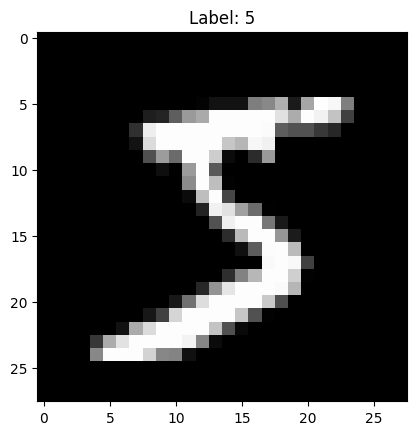

In [4]:
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()


In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten 2D image to 1D
    keras.layers.Dense(128, activation='relu'),  # Hidden layer
    keras.layers.Dense(10, activation='softmax') # Output layer
])


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
model.fit(X_train, y_train, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8796 - loss: 0.4284
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9638 - loss: 0.1238
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9753 - loss: 0.0807
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9814 - loss: 0.0601
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9863 - loss: 0.0452


In [8]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9682 - loss: 0.0996    
Test Accuracy: 0.973800003528595


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  
Predicted Label: 7


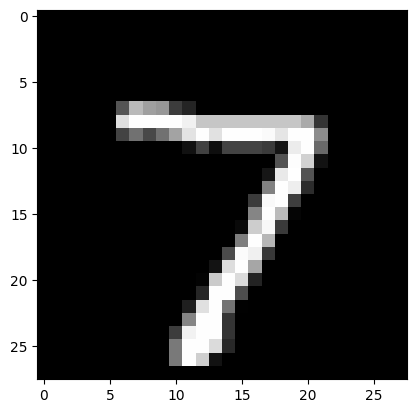

In [9]:
predictions = model.predict(X_test)

# Display prediction for first test image
print("Predicted Label:", np.argmax(predictions[0]))
plt.imshow(X_test[0], cmap='gray')
plt.show()
